# Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns
import wordcloud
import warnings
import sys
import os
sys.path.insert(0,f"/gpfs/fs1/home/{os.environ.get('USERNAME')}/.local/lib/python3.8/site-packages")
sys.path.insert(0,f"/gpfs/fs1/sfw2/python3/3.8.8/lib/python3.8/site-packages")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [50]:
import matplotlib
from cycler import cycler
plt.style.use('seaborn-pastel')
matplotlib.rcParams.update({'font.size': 16})
matplotlib.rc('axes',edgecolor='lightgrey')
default_cycler = (cycler(color=['b', 'r']))

palette = {"R":"tab:red",
           "D":"tab:blue"}

# Preprocessing
---

# Exploratory Data Analysis
---

In [74]:
df = pd.read_csv("clean_training_data.csv")
df.rename(columns={"text_clean":"tokens"}, inplace=True)
df.head(5)

favorite_count                                          full_text  \
0               0  ['RT', '@', 'KUSINews', ':', 'One', 'of', 'our...   
1             258  ['Today', 'I', "'m", 'urge', 'the', '@', 'CDCg...   
2               0  ['Tomorrow', ',', '#', 'MO03', 'senior', 'grad...   
3               9  ['Congrats', 'to', '#', 'TeamUSA', 'and', 'Can...   
4               3  ['Pleased', 'to', 'support', '@', 'amergateway...   

                 hashtags  retweet_count    year party_id  \
0                    KUSI             10  2017.0        R   
1             Coronavirus            111  2020.0        R   
2                    MO03              2  2014.0        R   
3    TeamUSA WorldJuniors              3  2017.0        R   
4  ImmigrantHeritageMonth              3  2019.0        D   

                                              tokens  
0  KUSINews One of our longtime viewer be in Cong...  
1  Today urge the CDCgov to immediately launch ph...  
2  Tomorrow MO03 senior graduate from Calvary Lut...  
3  Congrats to TeamUSA and Canton Native JGreenwa...  
4  Pleased to support amergateways at their June ...

In [77]:
df["tokens"] = df.tokens.fillna("")
df["tweet_len"] = df.full_text.map(lambda sentence: len(sentence))
df["token_len"] = df.tokens.apply(lambda sentence: len(sentence))

In [78]:
dems = df[df['party_id'] == "D"]["tokens"]
reps = df[df['party_id'] == "R"]["tokens"]

## Missing Values

<AxesSubplot:>

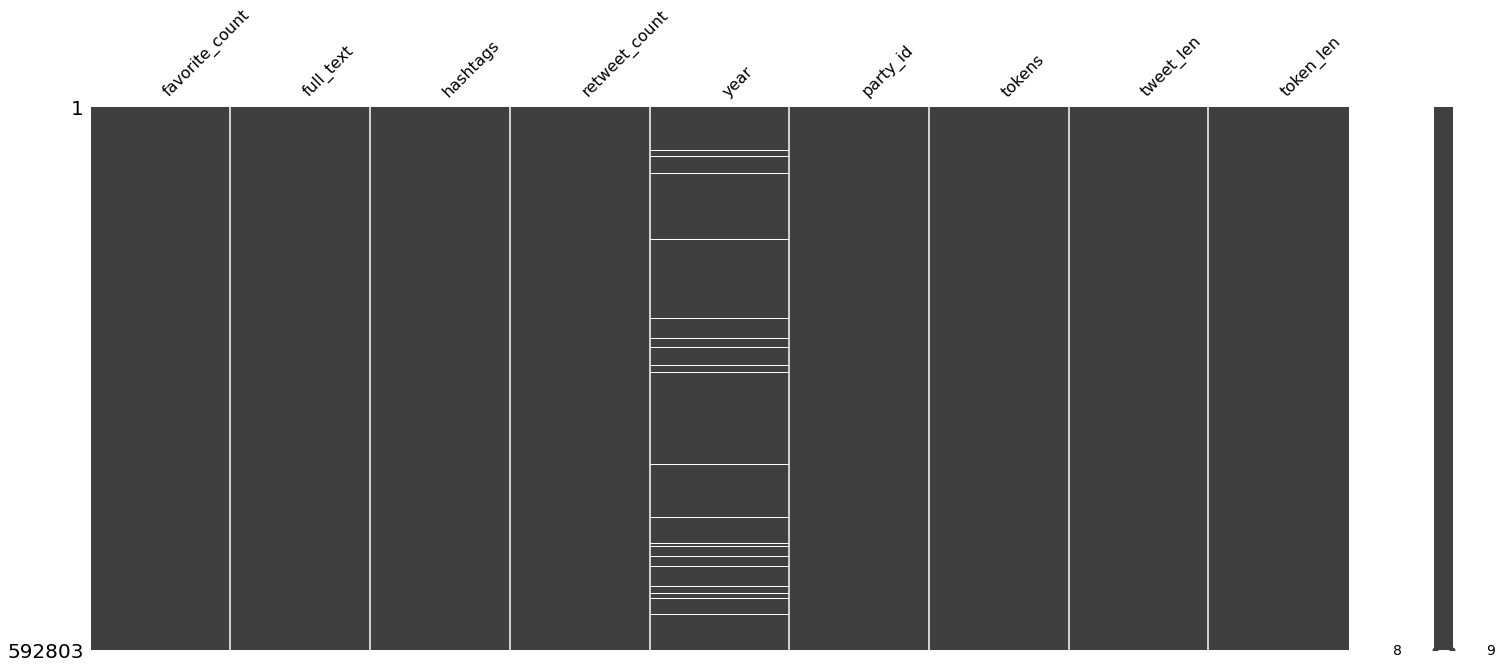

In [16]:
import missingno as msno
msno.matrix(df=df, color=(0.25, 0.25, 0.25))

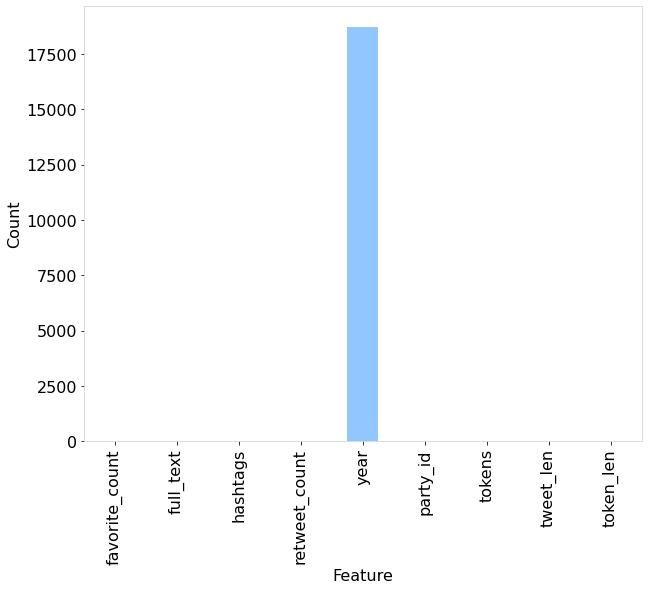

In [25]:
nullCount = df.isnull().sum()
nullCount.plot(kind='bar', figsize=(10, 8))
plt.xlabel("Feature")
plt.ylabel("Count")
plt.savefig('./plots/nullValsDistr.jpg')

## Target balance

In [26]:
import plotly.graph_objects as go
colors = ['Red', 'Blue']
labels = ['Republican','Democratic']
values = df['party_id'].value_counts()/df['party_id'].shape[0]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(
    title_text="Target Balance",
    title_font_color="black",
    legend_title_font_color="yellow",
    paper_bgcolor="white",
    plot_bgcolor='white',
    font_color="black",
)
fig.show()

## Top 10 Used Hashtags By Party ID

In [27]:
demtags = df[df["party_id"] == "D"].hashtags
reptags = df[df["party_id"] == "R"].hashtags

In [28]:
N = 10

In [29]:
from collections import Counter
demtagsCounter = Counter(demtags).most_common(N)
reptagsCounter = Counter(reptags).most_common(N)

In [30]:
demplotdf = pd.DataFrame(demtagsCounter, columns=['hashtags','frequency'])
repplotdf = pd.DataFrame(reptagsCounter, columns=['hashtags','frequency'])

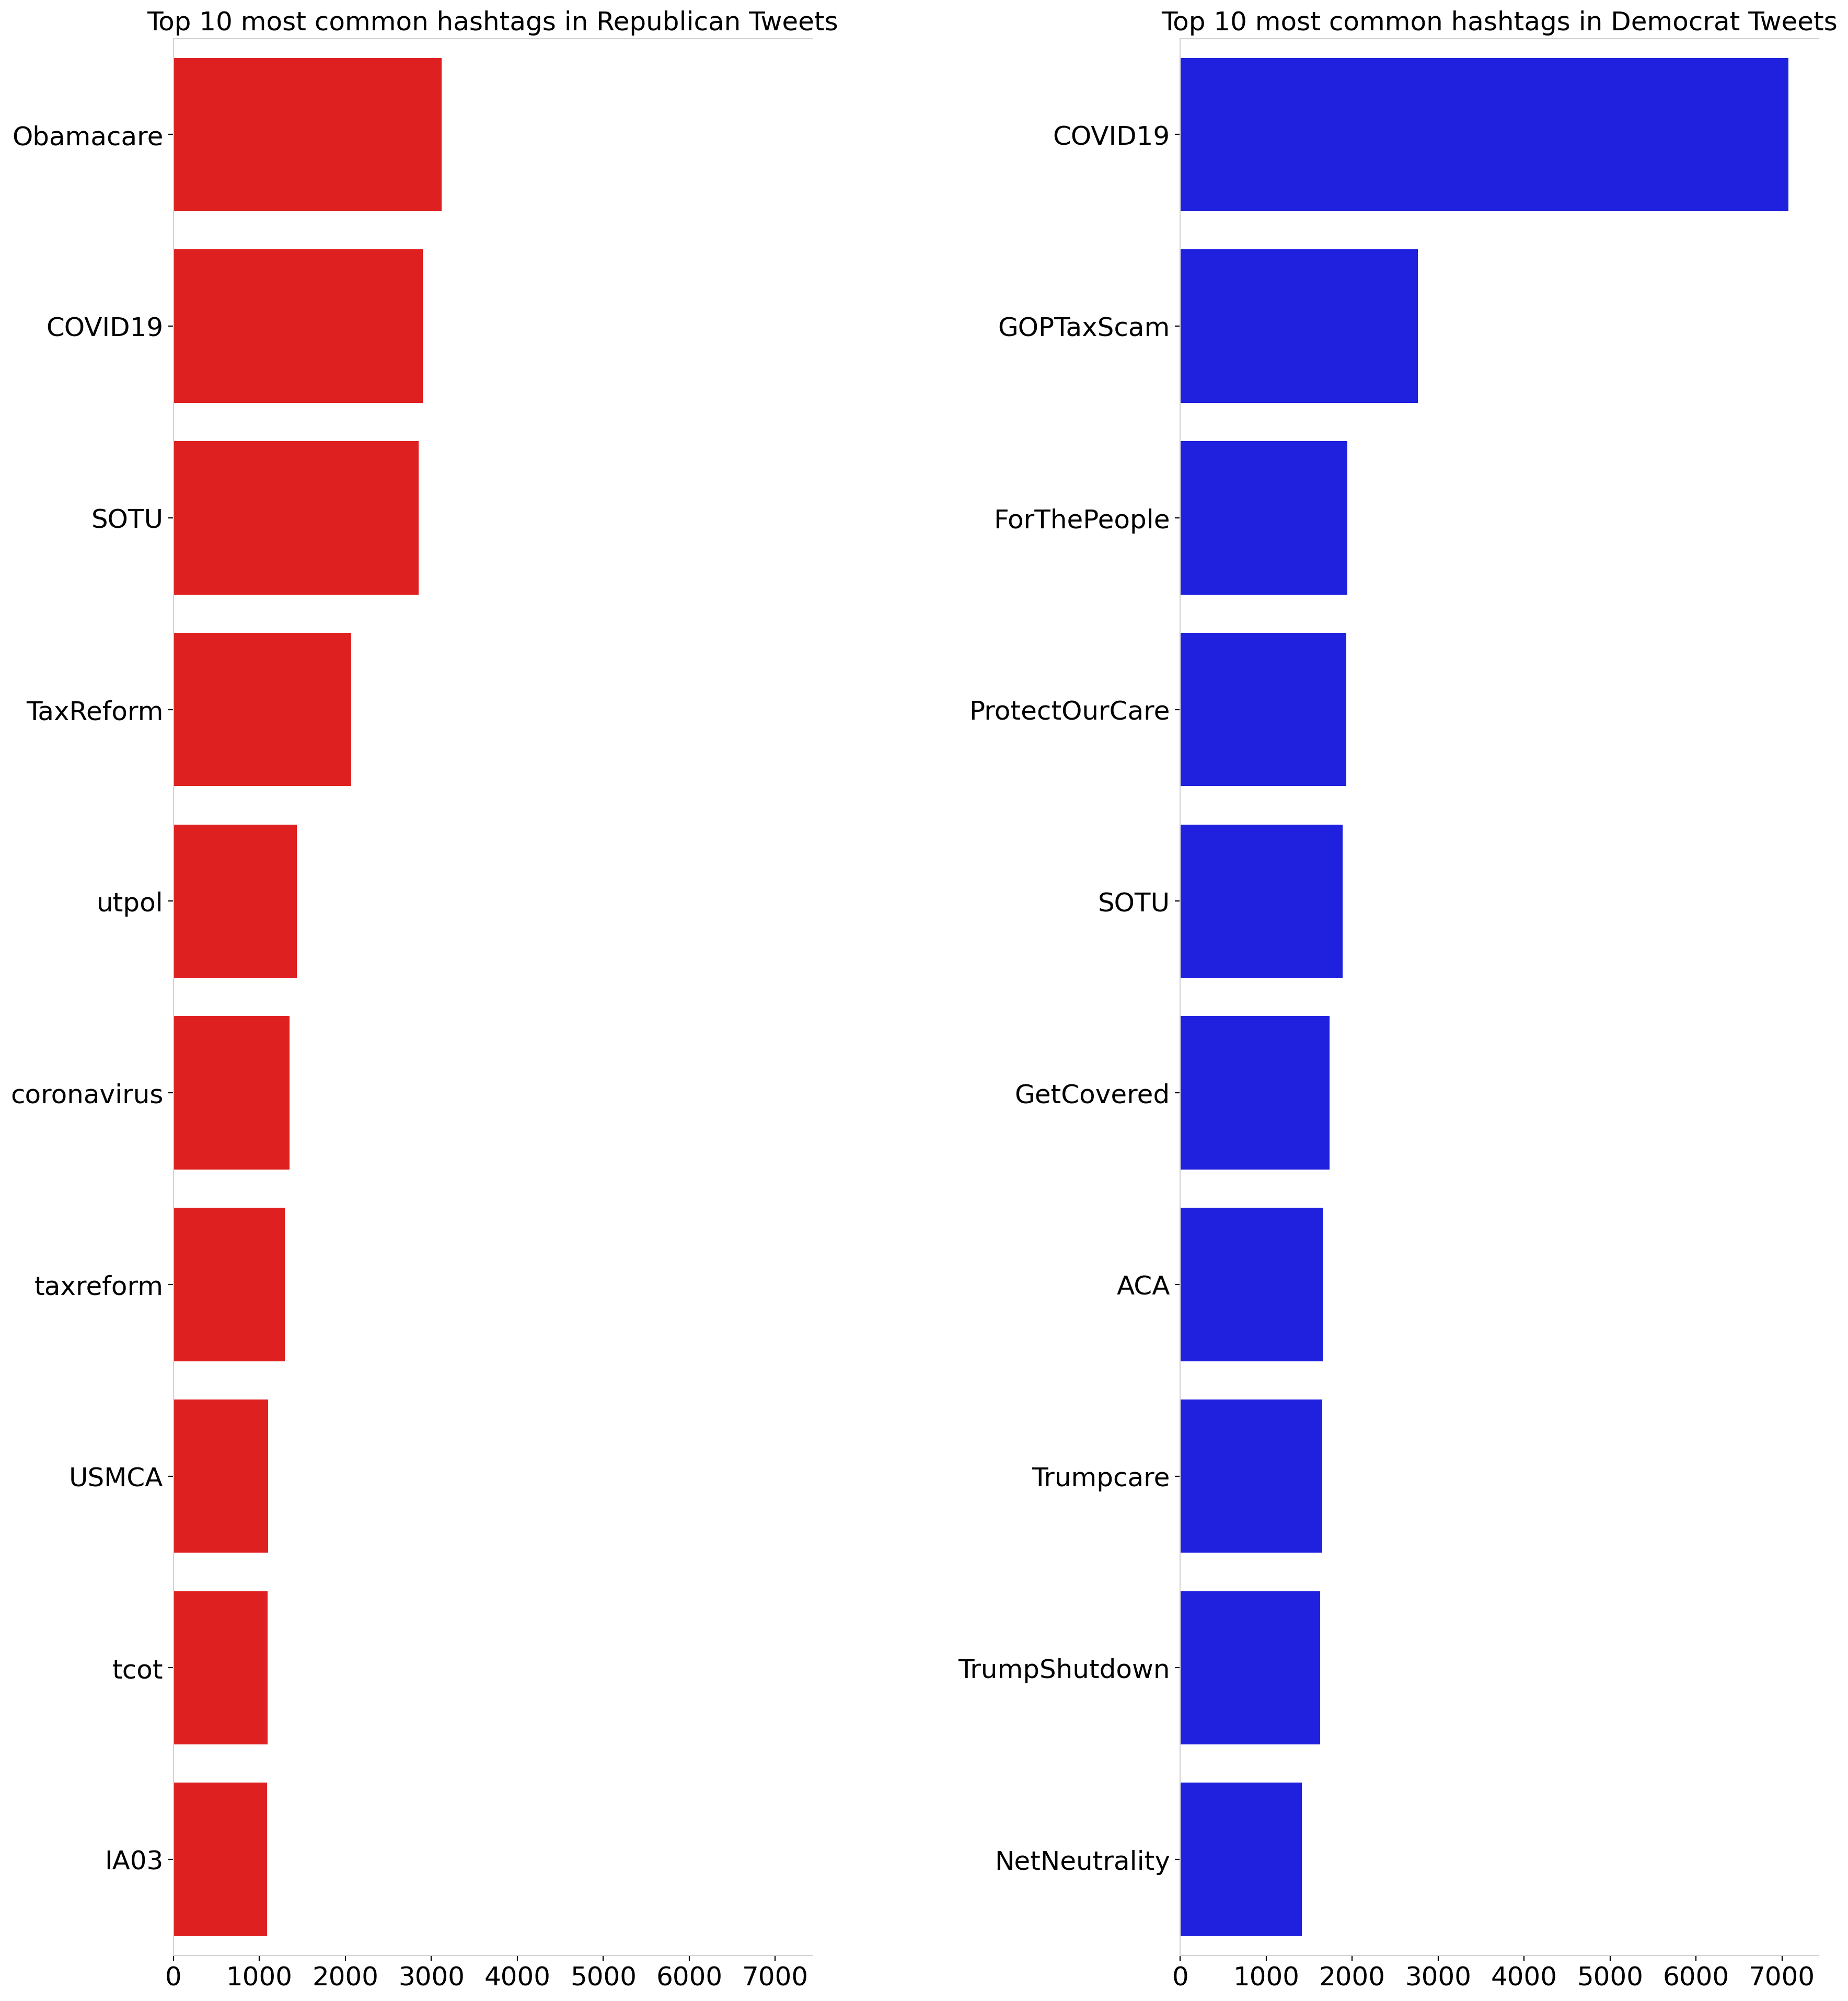

In [42]:
fig, axes = plt.subplots(ncols=2, figsize=(18, 20), dpi=200, sharex=True)
plt.tight_layout(w_pad=5)

sns.barplot(y=repplotdf["hashtags"].values, x=repplotdf["frequency"].values, ax=axes[0], color='red')
sns.barplot(y=demplotdf["hashtags"].values, x=demplotdf["frequency"].values, ax=axes[1], color='blue')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=18)
    axes[i].tick_params(axis='y', labelsize=18)
    
axes[0].set_title(f'Top {N} most common hashtags in Republican Tweets', fontsize=18)
axes[1].set_title(f'Top {N} most common hashtags in Democrat Tweets', fontsize=18)
plt.savefig("./plots/top10hashtags.jpg", bbox_inches='tight')

## BIGRAM and TRIGRAM

In [43]:
from collections import defaultdict
from wordcloud import STOPWORDS

def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

N = 25

### BiGram

In [44]:
# Bigrams
rep_bigrams = defaultdict(int)
dem_bigrams = defaultdict(int)

for tweet in reps:
    for word in generate_ngrams(tweet, n_gram=2):
        rep_bigrams[word] += 1
        
for tweet in dems:
    for word in generate_ngrams(tweet, n_gram=2):
        dem_bigrams[word] += 1
        
df_rep_bigrams = pd.DataFrame(sorted(rep_bigrams.items(), key=lambda x: x[1])[::-1])
df_dem_bigrams = pd.DataFrame(sorted(dem_bigrams.items(), key=lambda x: x[1])[::-1])


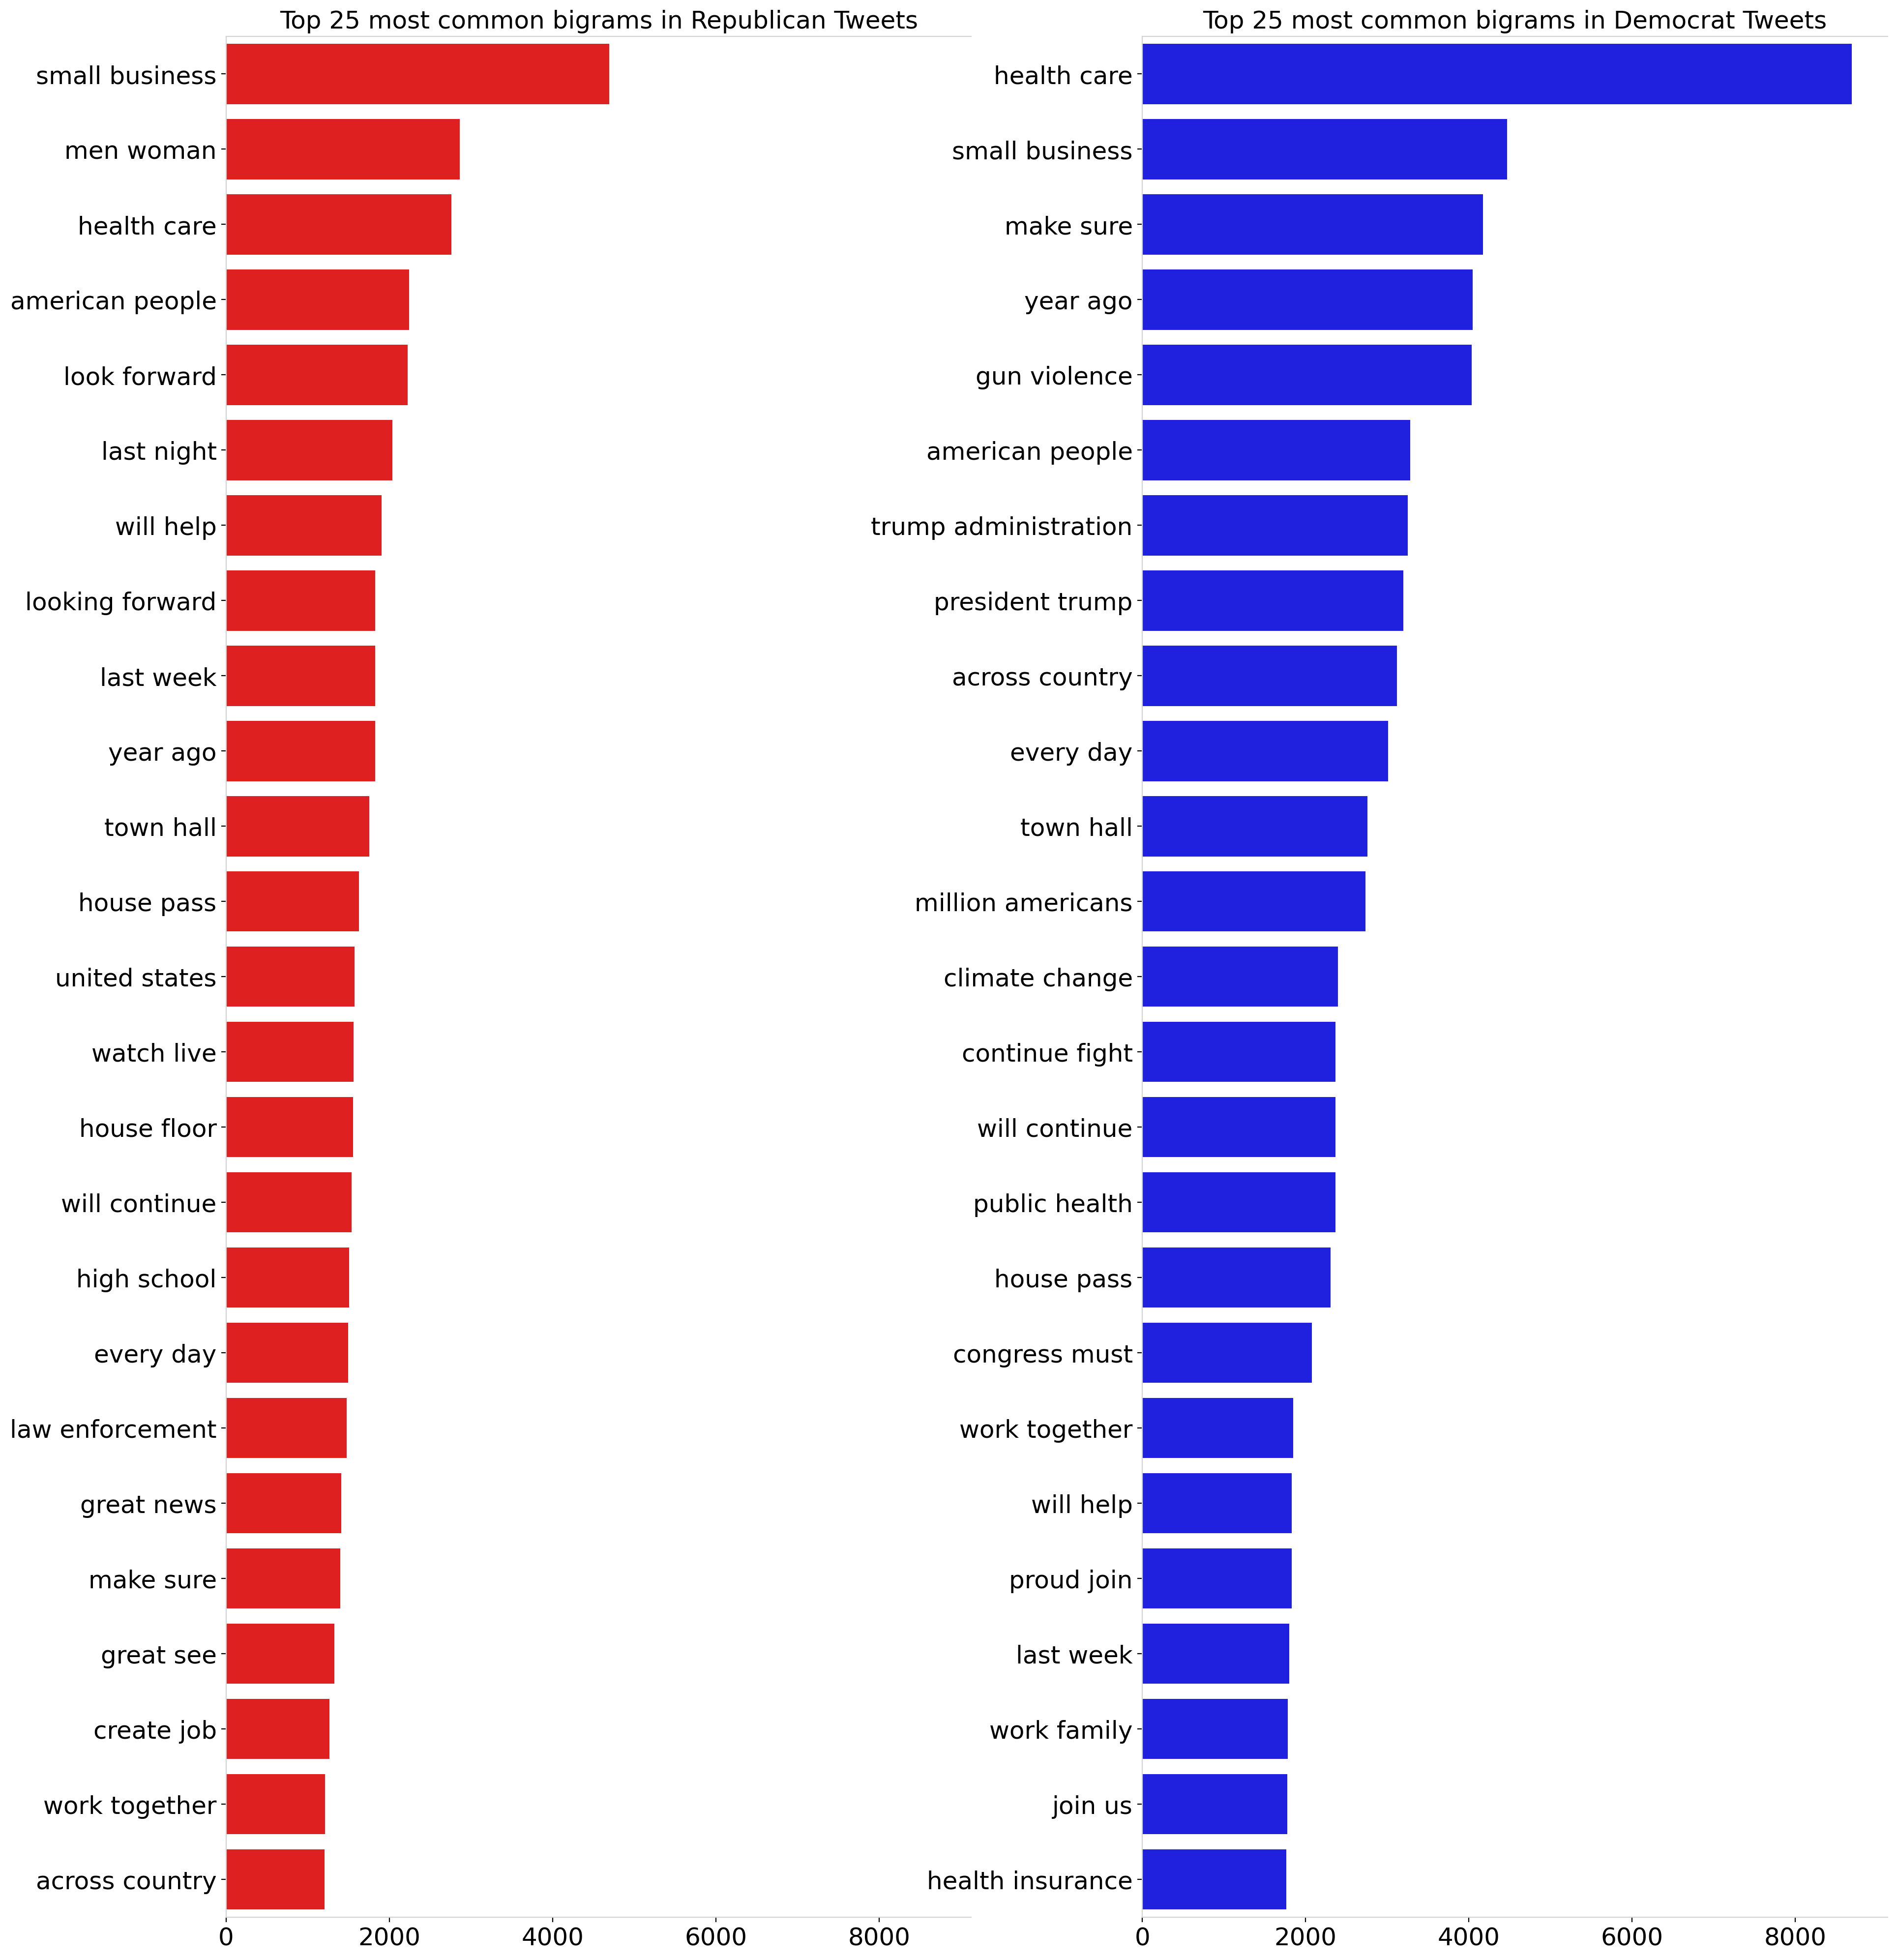

In [52]:
fig, axes = plt.subplots(ncols=2, figsize=(18, 20), dpi=200, sharex=True)
plt.tight_layout(w_pad=5)

sns.barplot(y=df_rep_bigrams[0].values[:N], x=df_rep_bigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=df_dem_bigrams[0].values[:N], x=df_dem_bigrams[1].values[:N], ax=axes[1], color='blue')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=18)
    axes[i].tick_params(axis='y', labelsize=18)

axes[0].set_title(f'Top {N} most common bigrams in Republican Tweets', fontsize=18)
axes[1].set_title(f'Top {N} most common bigrams in Democrat Tweets', fontsize=18)
plt.savefig("./plots/bigrams.jpg", bbox_inches='tight')
plt.show()


### TriGram

In [47]:
# Trigrams
rep_trigrams = defaultdict(int)
dem_trigrams = defaultdict(int)

for tweet in reps:
    for word in generate_ngrams(tweet, n_gram=3):
        rep_trigrams[word] += 1
        
for tweet in dems:
    for word in generate_ngrams(tweet, n_gram=3):
        dem_trigrams[word] += 1
        
df_rep_trigrams = pd.DataFrame(sorted(rep_trigrams.items(), key=lambda x: x[1])[::-1])
df_dem_trigrams = pd.DataFrame(sorted(dem_trigrams.items(), key=lambda x: x[1])[::-1])

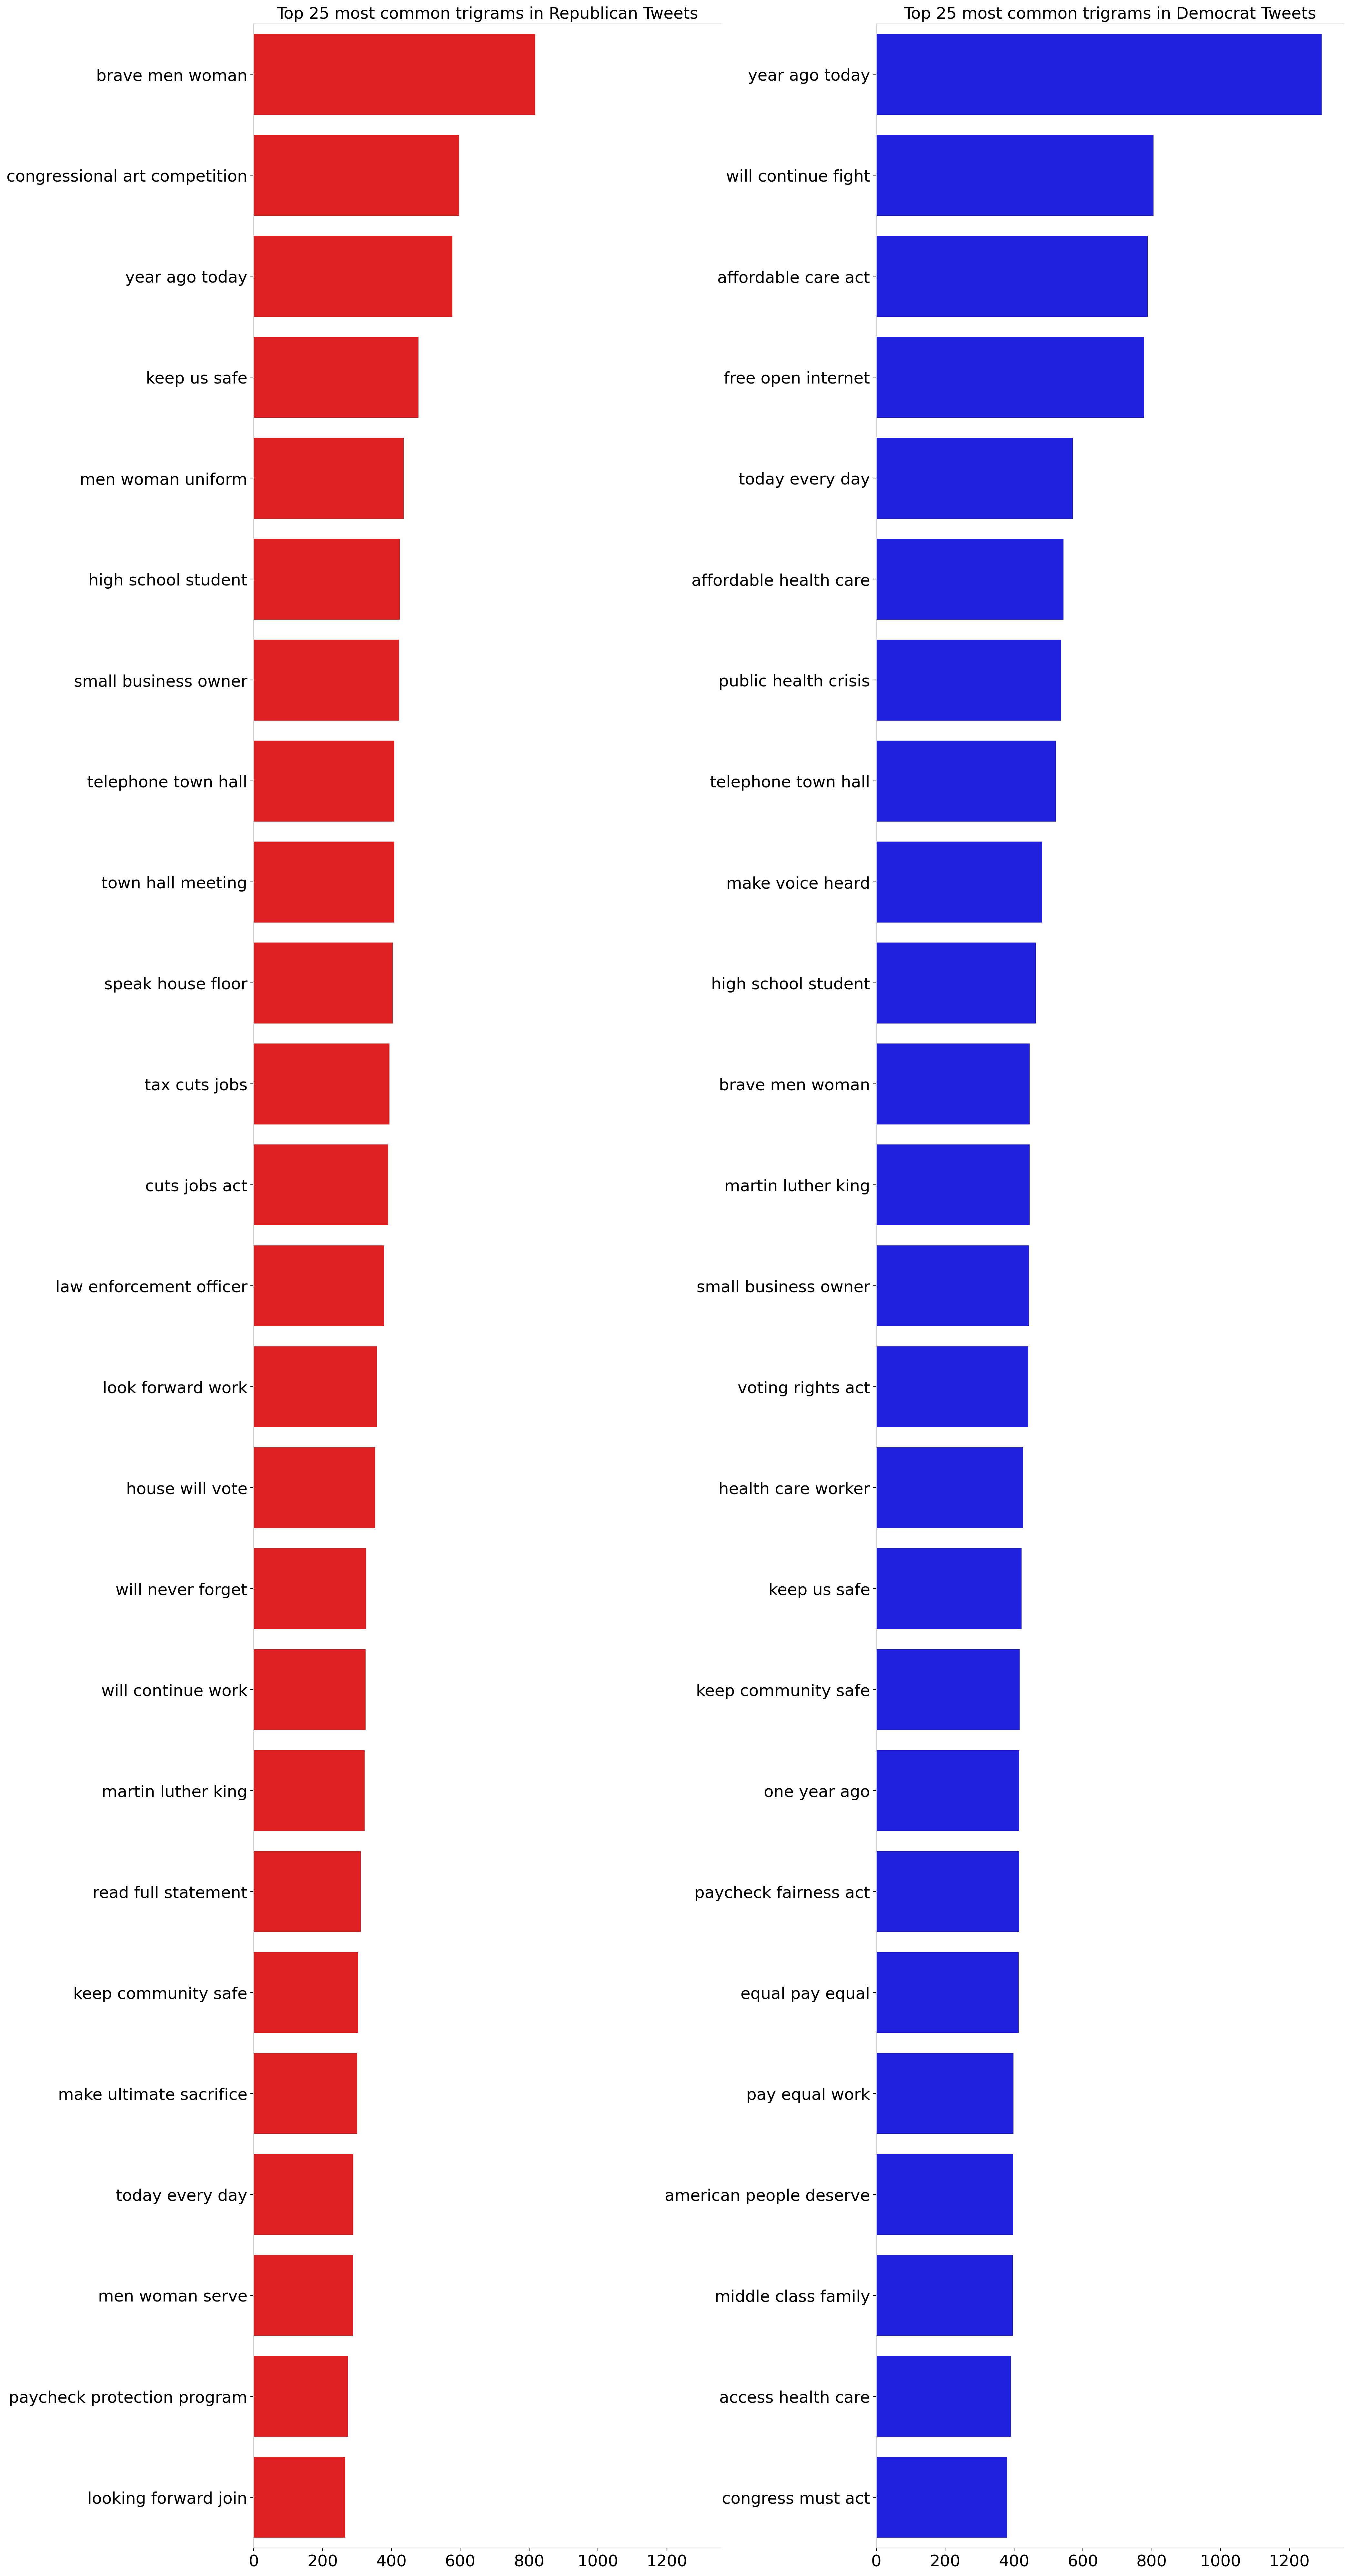

In [53]:
fig, axes = plt.subplots(ncols=2, figsize=(18, 40), dpi=200, sharex=True)
plt.tight_layout(w_pad=8)

sns.barplot(y=df_rep_trigrams[0].values[:N], x=df_rep_trigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=df_dem_trigrams[0].values[:N], x=df_dem_trigrams[1].values[:N], ax=axes[1], color='blue')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=18)
    axes[i].tick_params(axis='y', labelsize=18)

axes[0].set_title(f'Top {N} most common trigrams in Republican Tweets', fontsize=18)
axes[1].set_title(f'Top {N} most common trigrams in Democrat Tweets', fontsize=18)
plt.savefig("./plots/trigrams.jpg", bbox_inches='tight')
plt.show()



## Favorite Count Distribution By Party ID

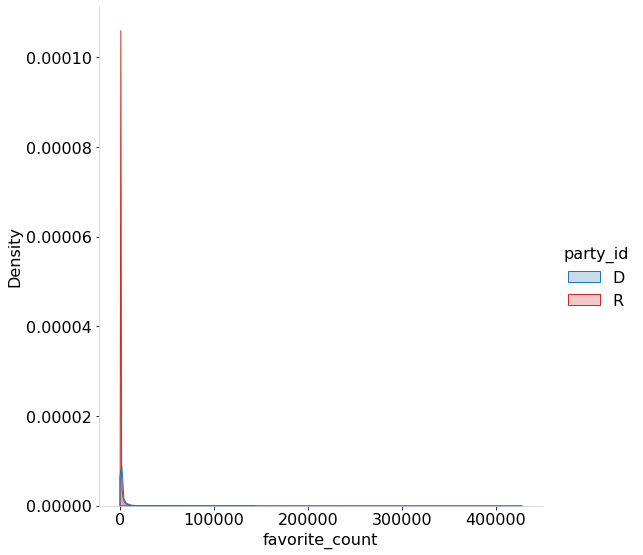

In [82]:
sns.displot(data=df.sort_values(by='favorite_count', ascending=False).iloc[:1000,:], x="favorite_count", hue="party_id",  kind='kde', fill=True, palette=palette, height=8)

plt.savefig('./plots/top5000favcountsbyparty.jpg', bbox_inches='tight')
# plt.xlim((0, 100000))

## Retweet Count Distribution By Party ID

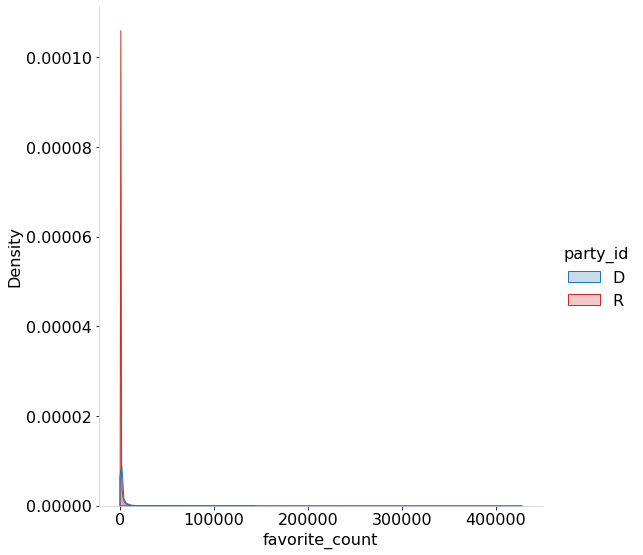

In [83]:
sns.displot(data=df.sort_values(by='retweet_count', ascending=False).iloc[:1000,:], x="favorite_count", hue="party_id",  kind='kde', fill=True, palette=palette, height=8)
plt.savefig('./plots/top5000rtcountsbyparty.jpg', bbox_inches='tight')
# plt.xlim((0, 100000))

## Word Cloud

In [60]:
from wordcloud import WordCloud
def createWC(text, savefilename):
    wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)
    plt.figure(figsize=(40,20))
    plt.tight_layout(pad=0)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig(f'./plots/{savefilename}.jpg', bbox_inches='tight')
    plt.show()
    

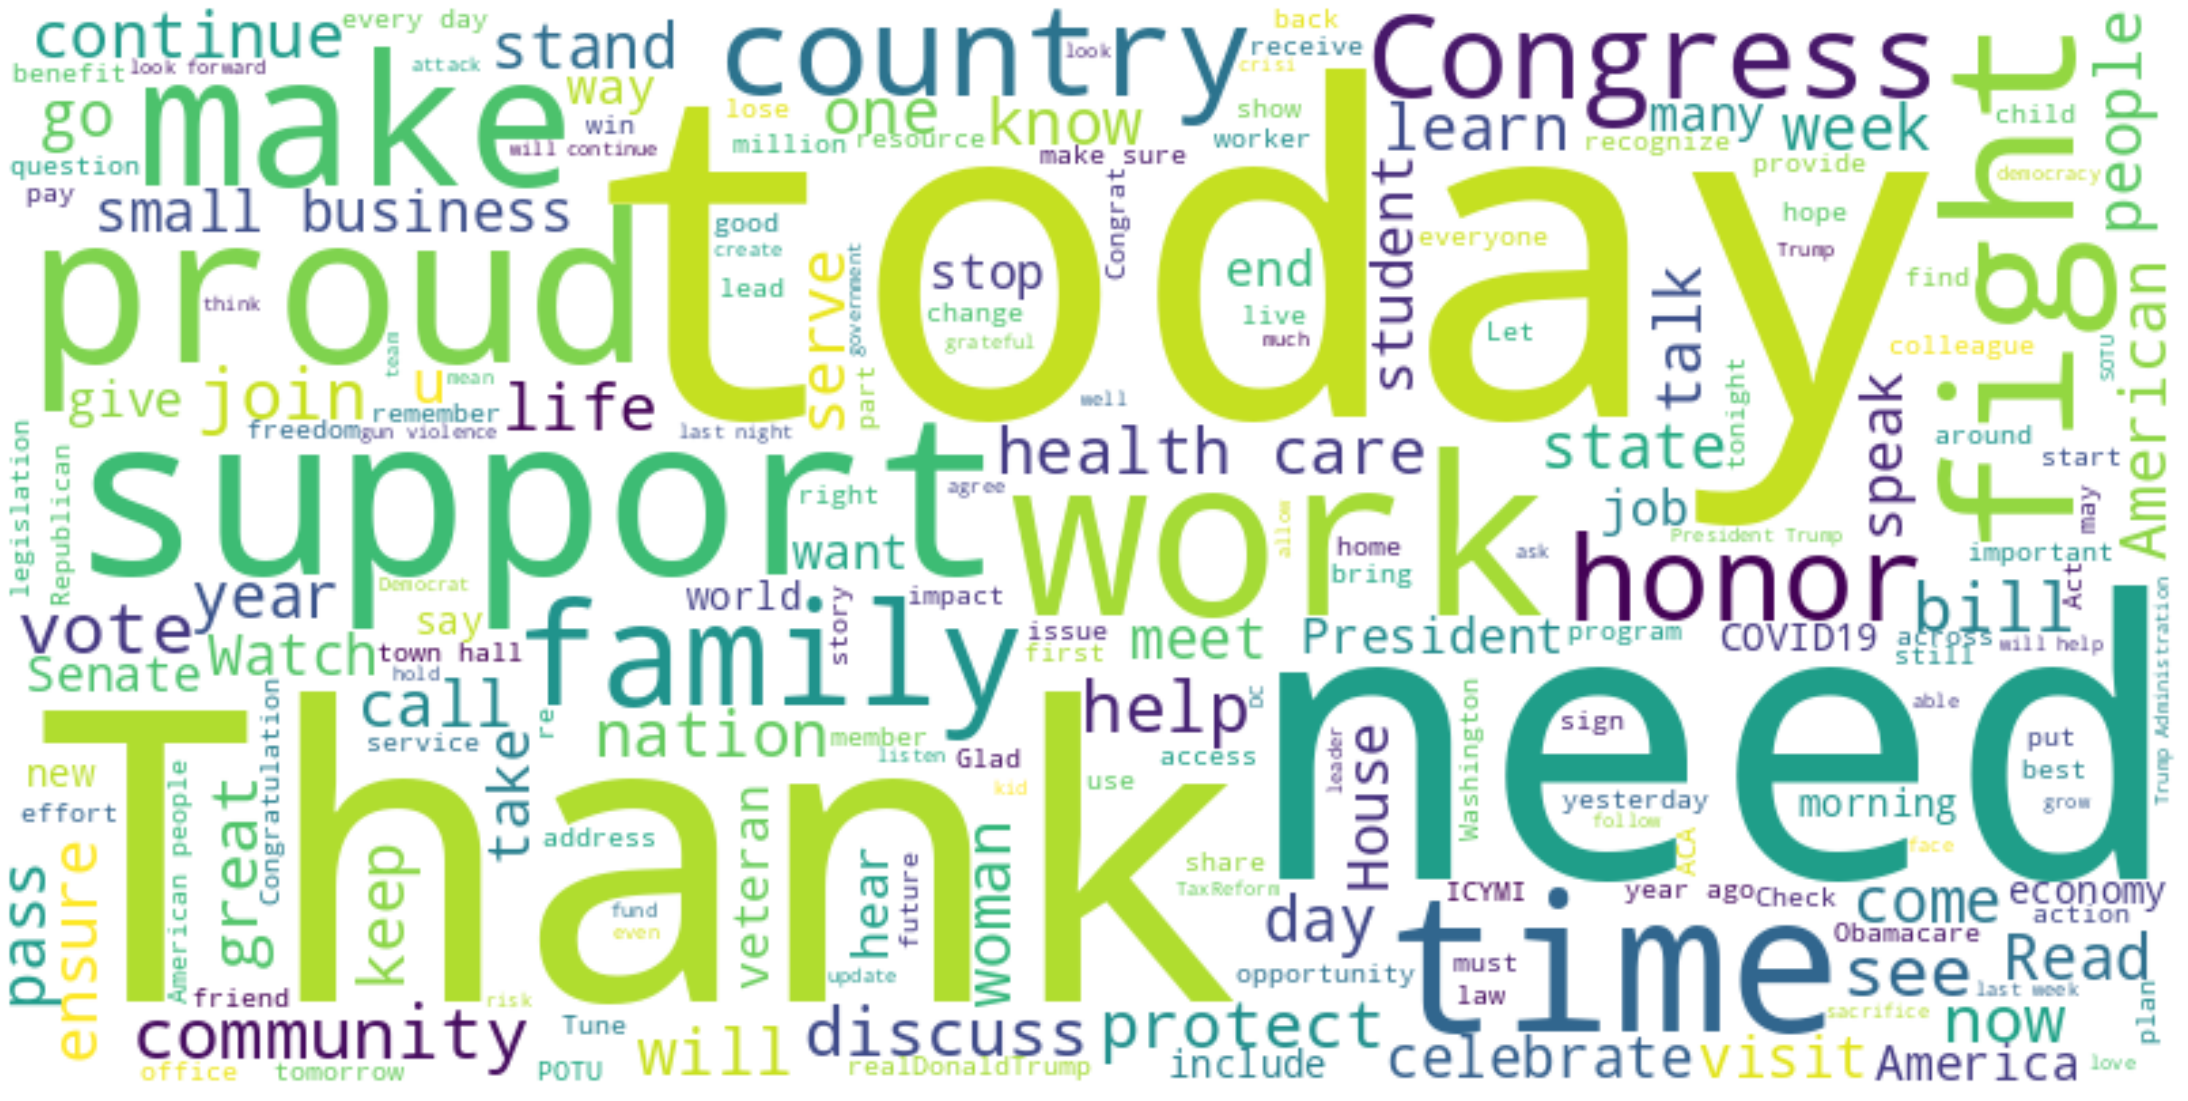

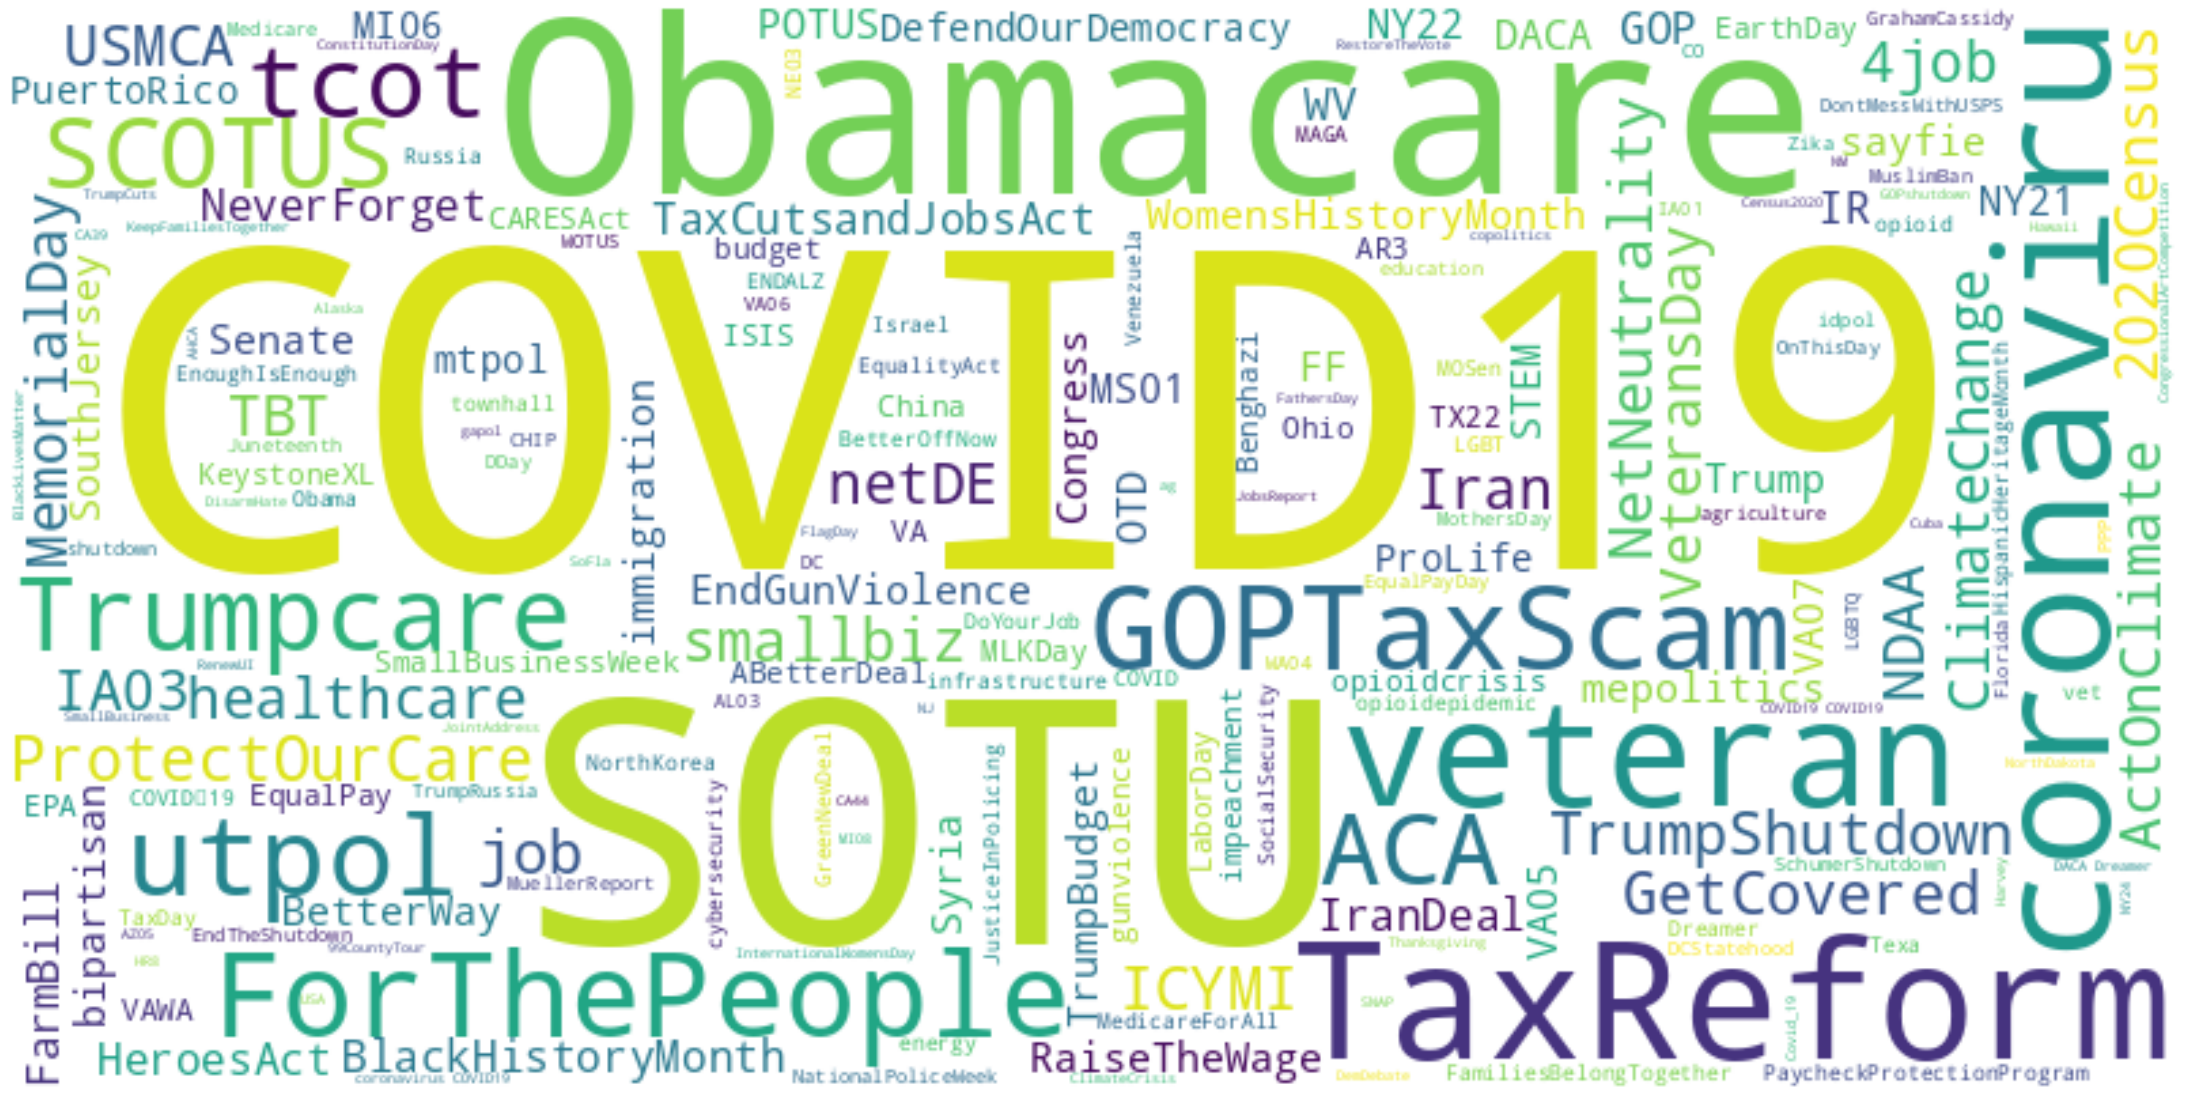

In [61]:
text = " ".join(token for token in df.tokens.astype(str))
hashtags = " ".join(tag for tag in df.hashtags.astype(str))

createWC(text, 'text')
createWC(hashtags, 'hashtags')

## Temporal Behavior of Retweets and Favorites By Party

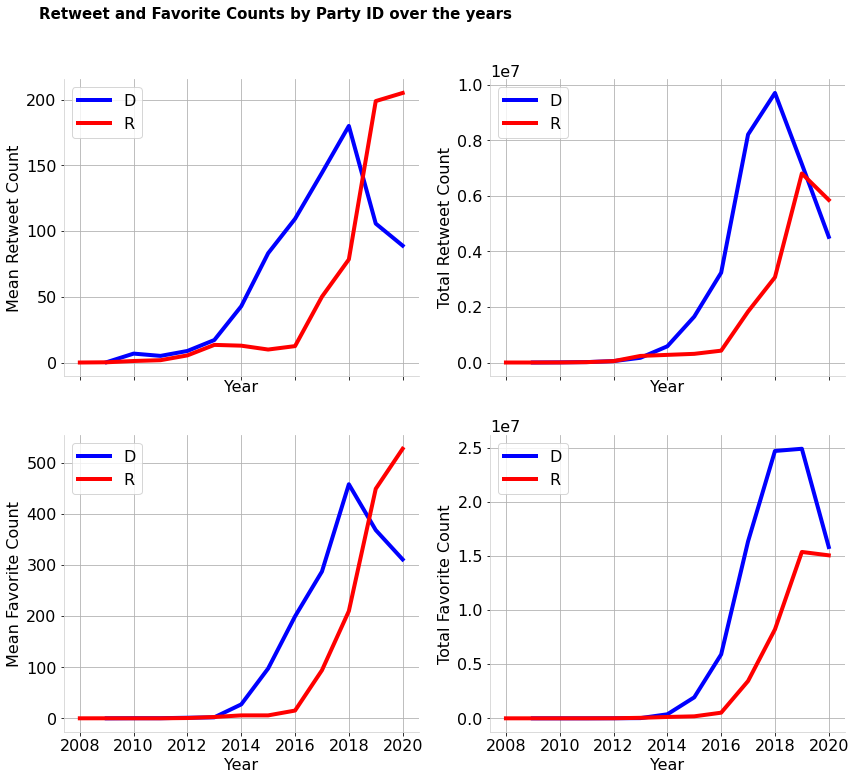

In [67]:
# Do a mean and sum temporal plot for retweet_count and favorite_count by party_id

plt.rc('lines', linewidth=4)
plt.rc('axes', prop_cycle=default_cycler)


DF_rt_mean = df.groupby(['year','party_id'])['retweet_count'].mean().unstack('party_id')
DF_rt_sum = df.groupby(['year','party_id'])['retweet_count'].sum().unstack('party_id')
DF_fav_mean = df.groupby(['year','party_id'])['favorite_count'].mean().unstack('party_id')
DF_fav_sum = df.groupby(['year','party_id'])['favorite_count'].sum().unstack('party_id')




fig, ax = plt.subplots(2, 2, figsize=(14, 12), sharex=True)
for row in DF_rt_mean:
    ax[0][0].plot(DF_rt_mean[row],label=row)
    ax[0][0].set_xlabel('Year')
    ax[0][0].set_ylabel('Mean Retweet Count')
    ax[0][0].legend()

for row in DF_rt_sum:
    ax[0][1].plot(DF_rt_sum[row],label=row)
    ax[0][1].set_xlabel('Year')
    ax[0][1].set_ylabel('Total Retweet Count')
    ax[0][1].legend()
    
for row in DF_fav_mean:
    ax[1][0].plot(DF_fav_mean[row],label=row)
    ax[1][0].set_xlabel('Year')
    ax[1][0].set_ylabel('Mean Favorite Count')
    ax[1][0].legend()

for row in DF_fav_sum:
    ax[1][1].plot(DF_fav_sum[row],label=row)
    ax[1][1].set_xlabel('Year')
    ax[1][1].set_ylabel('Total Favorite Count')
    ax[1][1].legend()


for r in range(2):
    for c in range(2):
        ax[r][c].grid()
        ax[r][c].spines['right'].set_visible(False)
        ax[r][c].spines['top'].set_visible(False)
        ax[r][c].legend(loc="upper left")
    
    
fig.text(0.1, 0.95, 'Retweet and Favorite Counts by Party ID over the years', fontsize=15, fontweight='bold')
plt.savefig(f'./plots/temp.jpg', bbox_inches='tight')
plt.show()

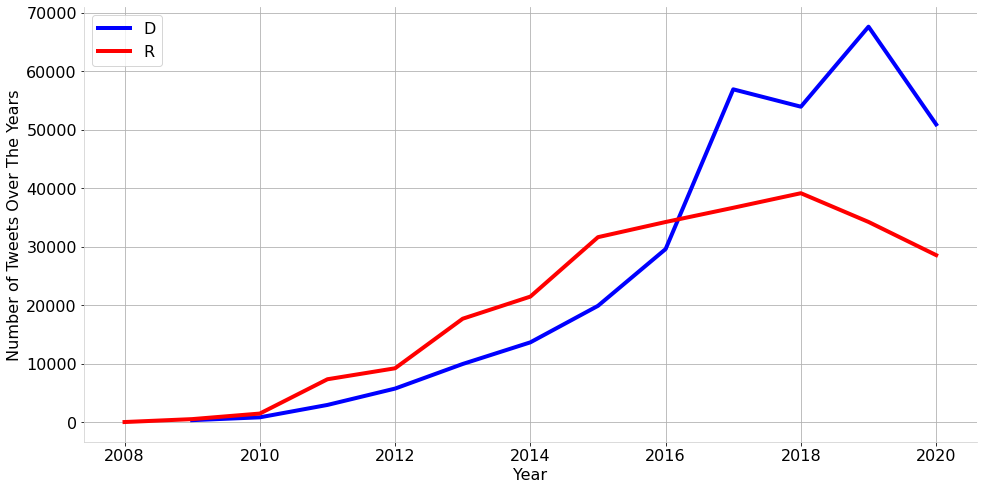

In [68]:
DF_tweet_count = df.groupby(['year','party_id'])['party_id'].count().unstack('party_id')

fig, ax = plt.subplots(1, 1, figsize=(16, 8), sharex=True)
for row in DF_tweet_count:
    ax.plot(DF_tweet_count[row],label=row)
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of Tweets Over The Years')
    ax.legend()

ax.grid()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(loc="upper left")
plt.savefig(f'./plots/tempNum.jpg', bbox_inches='tight')
plt.show()

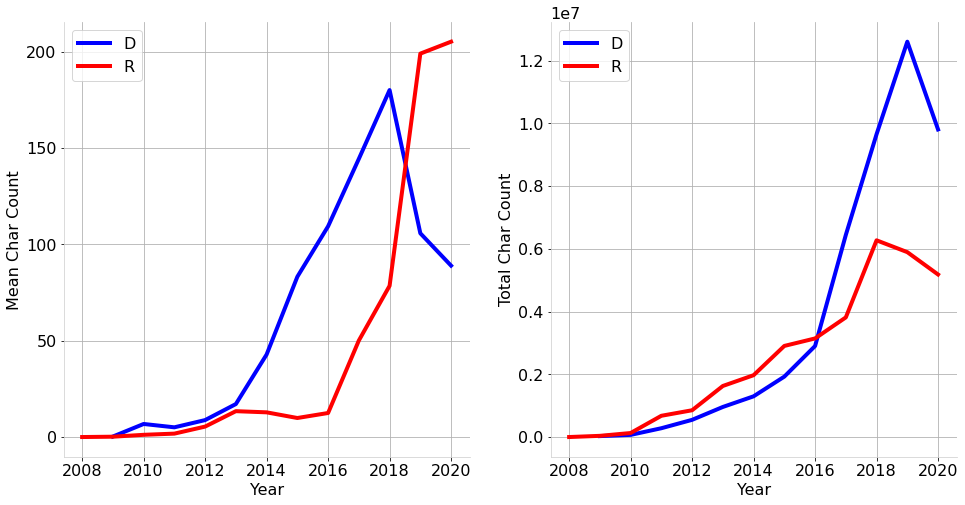

In [79]:
DF_len_mean = df.groupby(['year','party_id'])['token_len'].mean().unstack('party_id')
DF_len_sum = df.groupby(['year','party_id'])['token_len'].sum().unstack('party_id')

fig, ax = plt.subplots(1, 2, figsize=(16, 8), sharex=True)
for row in DF_len_mean:
    ax[0].plot(DF_rt_mean[row],label=row)
    ax[0].set_xlabel('Year')
    ax[0].set_ylabel('Mean Char Count')
    ax[0].legend()
    
for row in DF_len_sum:
    ax[1].plot(DF_len_sum[row],label=row)
    ax[1].set_xlabel('Year')
    ax[1].set_ylabel('Total Char Count')
    ax[1].legend()
    
for r in range(2):
        ax[r].grid()
        ax[r].spines['right'].set_visible(False)
        ax[r].spines['top'].set_visible(False)
        ax[r].legend(loc="upper left")
    


## Histogram Distribution of Characters

In [70]:
def drawHist(savefilename, column_name, bins, color='#86bf91'):
    ax = df.hist(column=column_name, bins=bins, grid=False, figsize=(12,8), color=color, zorder=2, rwidth=0.95)
    ax = ax[0]
    for x in ax:

        # Despine
        x.spines['right'].set_visible(False)
        x.spines['top'].set_visible(False)
        x.spines['left'].set_visible(False)

        # Switch off ticks
        x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

        # Draw horizontal axis lines
        vals = x.get_yticks()
        for tick in vals:
            x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

        # Remove title
        x.set_title("")

        # Set x-axis label
        x.set_xlabel("Number of characters", labelpad=20, weight='bold', size=12)

        # Set y-axis label
        x.set_ylabel("Count", labelpad=20, weight='bold', size=12)
        x.set_title(f"Histogram of Number of Characters in {''.join(column_name.split('_')[0]).title()}")
    plt.savefig(f'./plots/{savefilename}.jpg', bbox_inches='tight')


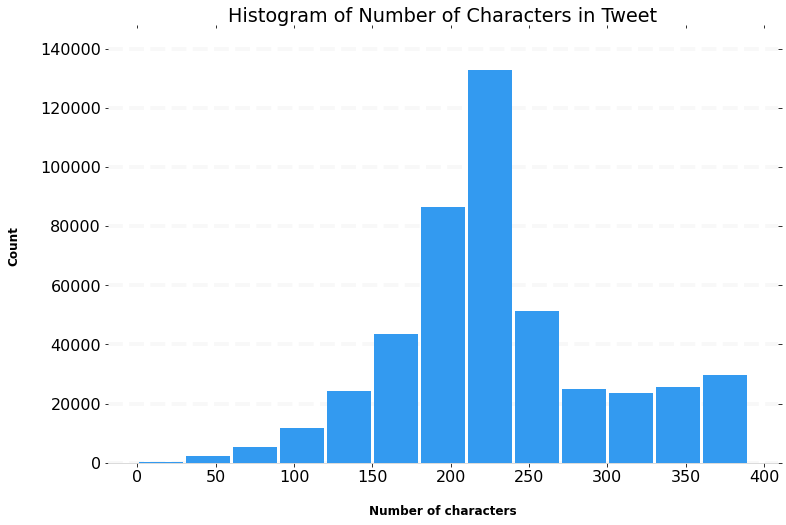

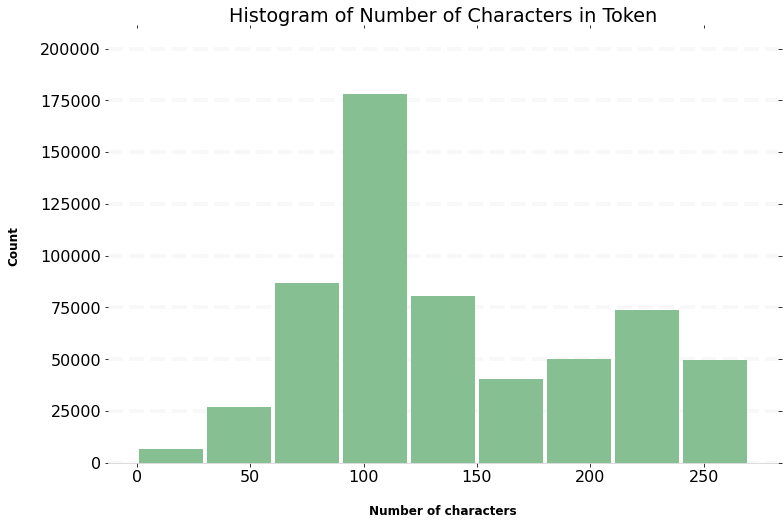

In [71]:
drawHist(column_name='tweet_len', bins=range(0,400,30), color="#339af0", savefilename='tweet_len')
drawHist(column_name='token_len', bins=range(0,300,30), savefilename='token_len')

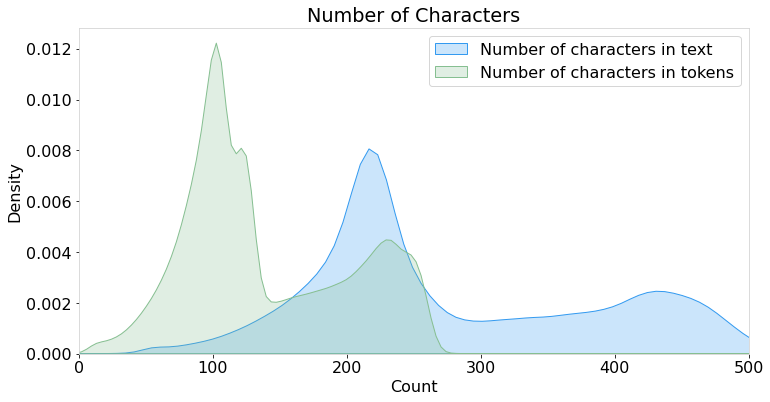

In [72]:
plt.figure(figsize=(12,6))
p1=sns.kdeplot(df['tweet_len'], shade=True, color="#339af0", label="Number of characters in text").set_title('Number of Characters')
p1=sns.kdeplot(df['token_len'], shade=True, color='#86bf91', label="Number of characters in tokens")
plt.legend()
plt.xlabel("Count")
plt.xlim((0,500))
plt.savefig('./plots/tweetvtokenlenkde.jpg', bbox_inches='tight')

## Correlation Between Numeric Features

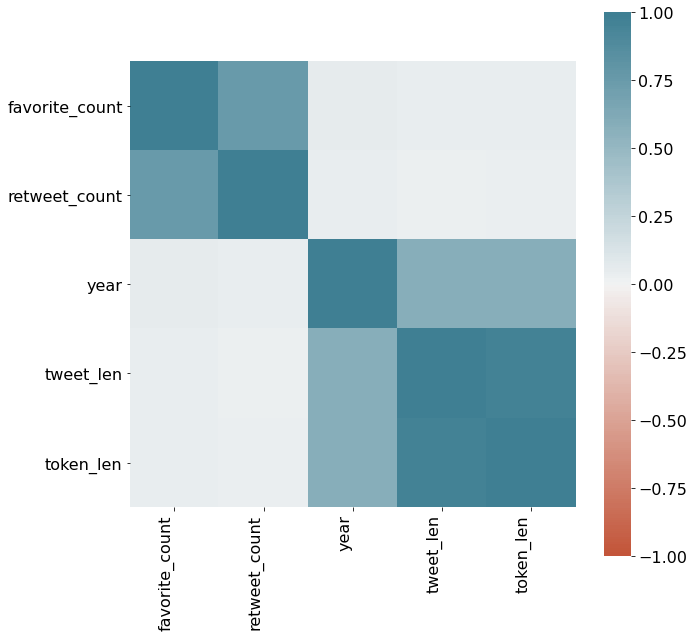

In [73]:
corr = df.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

plt.savefig('./plots/corr.jpg', bbox_inches='tight')
plt.show()